<a href="https://www.kaggle.com/code/jaikrishna612/eye-disease?scriptVersionId=125820881" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization 
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [13]:
data = []
result = []
def load_images(path):
    l1 = os.listdir(path)
    print(l1)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path+i+'/'+j)
            img = img.resize(size=(256,256))
            data.append(np.array(img))
            result.append(i)
    %matplotlib inline
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(5, 4, i+1)
        plt.imshow(data[i], cmap="gray")
        plt.axis('off')
    plt.show()
    return np.array(data),result

['glaucoma', 'normal', 'diabetic_retinopathy', 'cataract']


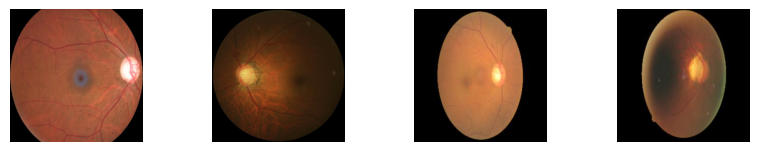

In [14]:
data,result = load_images("/kaggle/input/eye-diseases-classification/dataset/")

In [19]:
print(np.array(data))

[[[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  ...

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]]


 [[[0 0 0]
   [0 0 0]
   [0 0 0]
   ...
   [0 0 0]
   [0 0 0]
   [0 0 0]]

  [[0 0

In [21]:
t = pd.Series(result,dtype='category').cat.codes

In [22]:
t

0       2
1       2
2       2
3       2
4       2
       ..
4212    0
4213    0
4214    0
4215    0
4216    0
Length: 4217, dtype: int8

In [23]:
x_train , x_test , y_train , y_test = train_test_split(data ,t , test_size = 0.10 , shuffle = True , random_state = 10)

In [24]:
print("x_train Shape : ", x_train.shape) 
print("x_test Shape : ", x_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

x_train Shape :  (3795, 256, 256, 3)
x_test Shape :  (422, 256, 256, 3)
y_train Shape:  (3795,)
y_test Shape:  (422,)


In [25]:
import tensorflow.keras as K

In [26]:
input_v = K.Input(shape=(256,256,3))

In [27]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',input_tensor = input_v)

58889256/58889256 [==============================] - 0s 0us/step


In [28]:
for layer in modelVGG.layers:
    layer.trainable = False

In [29]:
num_classes = 4
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dropout(0.625, name='dropout_1')(top_model)
#         top_model = Dense(1024,activation='relu')(top_model)
#         top_model = Dropout(0.625, name='dropout_2')(top_model)
        top_model = Dense(4096,activation='relu')(top_model)
        top_model = Dense(4,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [30]:
num_classes = 4
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [32]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [33]:
history = model.fit(x_train , y_train , epochs = 10, validation_data = (x_test , y_test), verbose = 1)

Epoch 1/10
119/119 [==============================] - 24s 113ms/step - loss: 1.3762 - accuracy: 0.7299 - val_loss: 0.4892 - val_accuracy: 0.8081
Epoch 2/10
119/119 [==============================] - 10s 85ms/step - loss: 0.4513 - accuracy: 0.8282 - val_loss: 0.4269 - val_accuracy: 0.8483
Epoch 3/10
119/119 [==============================] - 10s 87ms/step - loss: 0.4375 - accuracy: 0.8358 - val_loss: 0.4581 - val_accuracy: 0.8057
Epoch 4/10
119/119 [==============================] - 10s 84ms/step - loss: 0.3898 - accuracy: 0.8509 - val_loss: 0.5110 - val_accuracy: 0.7962
Epoch 5/10
119/119 [==============================] - 10s 87ms/step - loss: 0.3916 - accuracy: 0.8480 - val_loss: 0.5248 - val_accuracy: 0.8104
Epoch 6/10
119/119 [==============================] - 10s 84ms/step - loss: 0.3642 - accuracy: 0.8622 - val_loss: 0.3810 - val_accuracy: 0.8720
Epoch 7/10
119/119 [==============================] - 10s 86ms/step - loss: 0.3245 - accuracy: 0.8733 - val_loss: 0.4274 - val_accuracy

In [34]:
loss,aac = model.evaluate(x_train,y_train)

119/119 [==============================] - 9s 74ms/step - loss: 0.2267 - accuracy: 0.9072


In [35]:
loss,aac = model.evaluate(x_test,y_test)

14/14 [==============================] - 1s 70ms/step - loss: 0.3810 - accuracy: 0.8626
